In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("lagadded_outrem.csv", low_memory=False)

In [3]:
commodity_name = 'Potato White'
df1 = df[df['Commodity'] == commodity_name]

In [4]:
df1

,Commodity,Date,Average,day,month,year,Season_Fall,Season_Spring,Season_Summer,Season_Winter,...,Indra Jatra_near,Lhosar_near,Janai Purnima_near,Gai Jatra_near,Maghe Sankranti_near,Shree Panchami_near,Fall_near,Spring_near,Summer_near,Winter_near
1,Potato White,2013-06-16,2.740840,16.0,6.0,2013.0,False,False,True,False,...,0,0,0,0,0,0,0,0,1,0
10,Potato White,2013-06-17,2.740840,17.0,6.0,2013.0,False,False,True,False,...,0,0,0,0,0,0,0,0,1,0
19,Potato White,2013-06-18,2.740840,18.0,6.0,2013.0,False,False,True,False,...,0,0,0,0,0,0,0,0,1,0
28,Potato White,2013-06-19,2.740840,19.0,6.0,2013.0,False,False,True,False,...,0,0,0,0,0,0,0,0,1,0
37,Potato White,2013-06-20,2.740840,20.0,6.0,2013.0,False,False,True,False,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30281,Potato White,2023-09-24,3.850148,24.0,9.0,2023.0,True,False,False,False,...,1,0,0,0,0,0,1,0,0,0
30289,Potato White,2023-09-25,3.850148,25.0,9.0,2023.0,True,False,False,False,...,0,0,0,0,0,0,1,0,0,0
30297,Potato White,2023-09-26,3.891820,26.0,9.0,2023.0,True,False,False,False,...,0,0,0,0,0,0,1,0,0,0
30305,Potato White,2023-09-27,3.850148,27.0,9.0,2023.0,True,False,False,False,...,0,0,0,0,0,0,1,0,0,0


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df1.drop(['Average', 'Commodity', 'Date'], axis=1),
                                                    df1['Average'], test_size=0.1, random_state=42)

lmodel = LinearRegression()
lmodel.fit(x_train, y_train)

y_pred = lmodel.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.04930110880885585
R-squared: 0.6598563777416239


In [6]:
import pandas as pd
from datetime import timedelta
import numpy as np
from sklearn.linear_model import LinearRegression

df1['Date'] = pd.to_datetime(df1['Date'])

predictions_df = pd.DataFrame(columns=['Commodity', 'Date', 'PredictedPrice'])

for commodity in df1['Commodity'].unique():
    last_date = df1[df1['Commodity'] == commodity]['Date'].max()
    commodity_data = df1[df1['Commodity'] == commodity].tail(1).drop(['Average', 'Commodity', 'Date'], axis=1)
    predicted_log_price = lmodel.predict(commodity_data)[0]
    predicted_price = np.exp(predicted_log_price)
    predictions_df = pd.concat([predictions_df, pd.DataFrame({'Commodity': [commodity],
                                                              'Date': [last_date + timedelta(days=7)],
                                                              'PredictedPrice': [predicted_price]})])

print(predictions_df)

      Commodity       Date  PredictedPrice
0  Potato White 2023-10-05       46.094934


C:\Users\nirvi\AppData\Local\Temp\ipykernel_35476\1808804311.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'])
C:\Users\nirvi\AppData\Local\Temp\ipykernel_35476\1808804311.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions_df = pd.concat([predictions_df, pd.DataFrame({'Commodity': [commodity],


In [17]:
df1.to_csv('potato_white.csv', index=False)

In [18]:
df1.head()

,Commodity,Date,Average,day,month,year,Season_Fall,Season_Spring,Season_Summer,Season_Winter,...,Indra Jatra_near,Lhosar_near,Janai Purnima_near,Gai Jatra_near,Maghe Sankranti_near,Shree Panchami_near,Fall_near,Spring_near,Summer_near,Winter_near
1,Potato White,2013-06-16,2.74084,16.0,6.0,2013.0,False,False,True,False,...,0,0,0,0,0,0,0,0,1,0
10,Potato White,2013-06-17,2.74084,17.0,6.0,2013.0,False,False,True,False,...,0,0,0,0,0,0,0,0,1,0
19,Potato White,2013-06-18,2.74084,18.0,6.0,2013.0,False,False,True,False,...,0,0,0,0,0,0,0,0,1,0
28,Potato White,2013-06-19,2.74084,19.0,6.0,2013.0,False,False,True,False,...,0,0,0,0,0,0,0,0,1,0
37,Potato White,2013-06-20,2.74084,20.0,6.0,2013.0,False,False,True,False,...,0,0,0,0,0,0,0,0,1,0


In [7]:
df1.dtypes

Commodity                           object
Date                        datetime64[ns]
Average                            float64
day                                float64
month                              float64
year                               float64
Season_Fall                           bool
Season_Spring                         bool
Season_Summer                         bool
Season_Winter                         bool
Apple(Jholey)                         bool
Banana                                bool
Carrot(Local)                         bool
Cucumber(Local)                       bool
Garlic Dry Nepali                     bool
Lettuce                               bool
Onion Dry (Indian)                    bool
Potato White                          bool
Tomato Big(Nepali)                    bool
Festival_Buddha Jayanti               bool
Festival_Dashain                      bool
Festival_Gai Jatra                    bool
Festival_Ghode Jatra                  bool
Festival_Ho

In [20]:
import joblib
joblib.dump(lmodel, 'maintraining.joblib')

['maintraining.joblib']

In [8]:
df1.dtypes

Commodity                           object
Date                        datetime64[ns]
Average                            float64
day                                float64
month                              float64
year                               float64
Season_Fall                           bool
Season_Spring                         bool
Season_Summer                         bool
Season_Winter                         bool
Apple(Jholey)                         bool
Banana                                bool
Carrot(Local)                         bool
Cucumber(Local)                       bool
Garlic Dry Nepali                     bool
Lettuce                               bool
Onion Dry (Indian)                    bool
Potato White                          bool
Tomato Big(Nepali)                    bool
Festival_Buddha Jayanti               bool
Festival_Dashain                      bool
Festival_Gai Jatra                    bool
Festival_Ghode Jatra                  bool
Festival_Ho

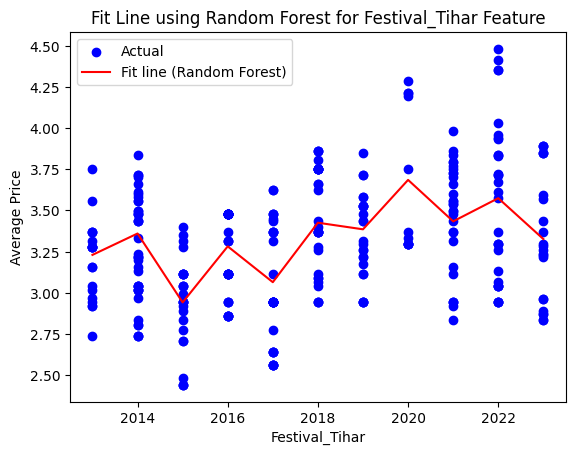

In [15]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming x_train and x_test contain the dataset features, and y_train, y_test contain the target 'Average'

# Filter the dataset to include only the 'Festival_Tihar' feature
x_train_tihar = x_train['Season_Fall'].values.reshape(-1, 1)  # Reshape for single feature
x_test_tihar = x_test['year'].values.reshape(-1, 1)  # Reshape for single feature

# Create and fit the Random Forest model with specified parameters
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Example parameters, adjust as needed
rf_model.fit(x_train_tihar, y_train)

# Predict based on the 'Festival_Tihar' feature
y_pred_tihar_rf = rf_model.predict(x_test_tihar)

# Sort the values for plotting the fit line
sorted_indices = x_test_tihar[:, 0].argsort()
x_test_tihar_sorted = x_test_tihar[sorted_indices]
y_pred_tihar_rf_sorted = y_pred_tihar_rf[sorted_indices]

# Plotting the fit line (boundary)
plt.scatter(x_test_tihar, y_test, color='blue', label='Actual')
plt.plot(x_test_tihar_sorted, y_pred_tihar_rf_sorted, color='red', label='Fit line (Random Forest)')

plt.xlabel('Festival_Tihar')
plt.ylabel('Average Price')
plt.title('Fit Line using Random Forest for Festival_Tihar Feature')
plt.legend()
plt.show()
